# Loss Function and Gradient Descent

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

## Warm-Up!


In [8]:
print(diabetes.data[:10])
print(diabetes.target[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


In [13]:
print("Feature names and their data types:")
for feature_name, dtype in zip(diabetes.feature_names, diabetes.data[0]):
    print(f"{feature_name}: {type(dtype).__name__}")

Feature names and their data types:
age: float64
sex: float64
bmi: float64
bp: float64
s1: float64
s2: float64
s3: float64
s4: float64
s5: float64
s6: float64


In [16]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
missing_values = df.isnull().sum()

print("Missing values per feature:")
print(missing_values)

if missing_values.sum() > 0:
    df.fillna(df.mean(), inplace=True)

    print("\nMissing values after handling:")
    print(df.isnull().sum())
else:
    print("\nNo missing values found.")

Missing values per feature:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

No missing values found.


In [18]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

diabetes.data = df_scaled

print("Min-Max scaled data:")
print(df_scaled[:5])

Min-Max scaled data:
[[0.66666667 1.         0.58264463 0.54929577 0.29411765 0.25697211
  0.20779221 0.28208745 0.562217   0.43939394]
 [0.48333333 0.         0.14876033 0.35211268 0.42156863 0.30677291
  0.62337662 0.14104372 0.22243673 0.16666667]
 [0.88333333 1.         0.51652893 0.43661972 0.28921569 0.25896414
  0.24675325 0.28208745 0.49657763 0.40909091]
 [0.08333333 0.         0.30165289 0.30985915 0.49509804 0.44721116
  0.23376623 0.42313117 0.57292288 0.46969697]
 [0.51666667 0.         0.20661157 0.54929577 0.46568627 0.41733068
  0.38961039 0.28208745 0.36238548 0.33333333]]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.05, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (419, 10) (419,)
Testing set shape: (23, 10) (23,)


## Main Task

### Part 1: Fuctions' Implementation

#### MSE

In [23]:
def mean_squared_error(y_true, y_pred):
    return np.average((y_true - y_pred) ** 2)

#### MAE

In [52]:
def mean_absolute_error(y_true, y_pred):
    return np.average(np.abs(y_pred - y_true), axis=0)

#### RMSE

In [53]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(
        mean_squared_error(
            y_true, y_pred
        )
    )

#### $R^2$ Score

In [27]:
def r2_score(y_true, y_pred):    
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    

### Part 2: Building and Training the Linear Regression Model

In [54]:

class CustomRegression:
    """
    A custom implementation of linear regression using the pseudo-inverse method.

    Attributes:
        coefficients (np.ndarray): Weight vector representing the coefficients of the linear regression model.
        y_pred (np.ndarray): Vector representing the predictions made by the model.

    Methods:
        fit(X, T):
            Perform linear regression using the pseudo-inverse method.
        
        predict(X):
            Predict the values for the given data matrix.
        
        score(y_true):
            Calculate evaluation metrics such as mean, maximum, minimum, RMSE, and R^2 for the model predictions.
    """

    def __init__(self) -> None:
        self.coefficients: np.ndarray = None
        self.y_pred: np.ndarray = None

    def __str__(self):
        return 'CustomRegression'
    
    def fit(self, X: np.ndarray, T: np.ndarray) -> 'CustomRegression':
        """
        Perform linear regression using the pseudo-inverse method.

        Args:
            X (np.ndarray): Input feature matrix of shape (n_samples, n_features).
            T (np.ndarray): Target variable vector of shape (n_samples,).

        Returns:
            CustomRegression: The fitted CustomRegression instance.

        Raises:
            ValueError: If the shapes of X and T are incompatible.
        """

        assert X.ndim == 2, "X must be a 2-dimensional array."
        assert T.ndim == 1, "T must be a 1-dimensional array."
        assert X.shape[0] == T.shape[0], "Number of samples in X and T must be equal."

        ones_column = np.ones((X.shape[0], 1))
        X = np.column_stack((ones_column, X))
        X_pinv = np.linalg.pinv(X)
        self.coefficients = np.dot(X_pinv, T)

        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the values for the given data matrix.

        Args:
            X (np.ndarray): Input feature matrix of shape (n_samples, n_features).

        Returns:
            np.ndarray: A vector representing the predictions for the input X.

        Raises:
            ValueError: If the shapes of X and the coefficient vector are incompatible.
        """
        assert X.ndim == 2, "X must be a 2-dimensional array."
        assert X.shape[1]+1 == self.coefficients.shape[0], "Number of features in X and coefficients must be equal."

        ones_column = np.ones((X.shape[0], 1))
        X = np.column_stack((ones_column, X))
        self.y_pred = np.dot(X, self.coefficients)
  
        return self.y_pred
    
    def score(self, y_true: np.ndarray) -> dict:
        """
        Calculate evaluation metrics such as mean, maximum, minimum, RMSE, and R^2 for the model predictions.

        Args:
            y_true (np.ndarray): Target variable vector of shape (n_samples,).

        Returns:
            dict: A dictionary containing evaluation metrics:
                - 'mean': Mean value of y_true.
                - 'maximum': Maximum value of y_true.
                - 'minimum': Minimum value of y_true.
                - 'RMSE': Root Mean Squared Error between y_true and the model predictions.
                - 'R2': Coefficient of Determination (R^2) between y_true and the model predictions.

        Raises:
            ValueError: If the shapes of y_true and self.y_pred are incompatible.
        """
        assert y_true.shape[0] == self.y_pred.shape[0], "Number of samples in y_true and self.y_pred must be equal."

        return {
            "MSE": f"{mean_squared_error(y_true, self.y_pred):.3f}",
            "MAE": f"{mean_absolute_error(y_true, self.y_pred):.3f}",
            "RMSE": f"{mean_squared_error(y_true, self.y_pred):.3f}",
            "R2": f"{r2_score(y_true, self.y_pred):.3f}",
        }

In [47]:
linear_model = CustomRegression()

In [48]:
linear_model.fit(X_train, y_train)

### Part 3: Model Evaluation

In [49]:
y_pred = linear_model.predict(X_test)

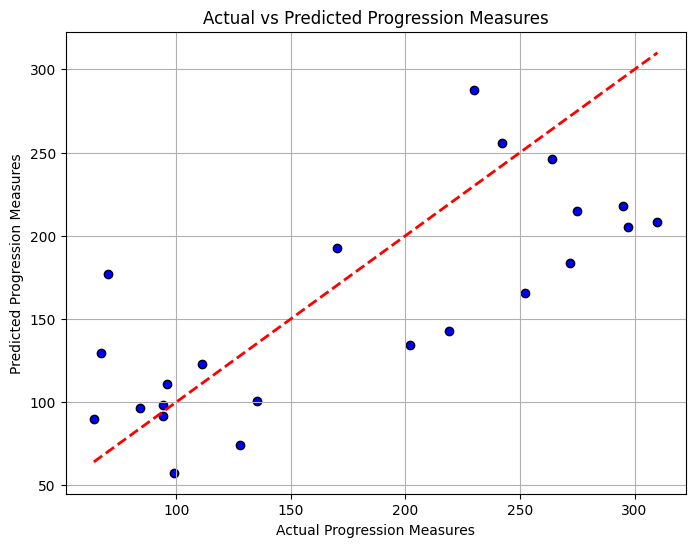

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.title('Actual vs Predicted Progression Measures')
plt.grid(True)
plt.show()

In [56]:
linear_model.predict(X_train)
linear_model.score(y_train)

{'MSE': '2831.220', 'MAE': '42.964', 'RMSE': '2831.220', 'R2': '0.514'}

In [55]:
linear_model.predict(X_test)
linear_model.score(y_test)

{'MSE': '3516.111', 'MAE': '49.278', 'RMSE': '3516.111', 'R2': '0.516'}